# **Analise de fatores**
### pressupostos
* ### Variaveis metricas 
* ### variaveias continuas ou ordinarias
* ### Existe uma correlação >0.3 entre variaveias do conjunto de dados
* ### maior que 100 observaçoes e > 5 observacao por variavel 
* ### Amostra homogenia

## **Analise de fatores tambem reduz consideravelmente a dimensonalidade dos dados**
---
### 1- reducao de dimensonalidade

In [70]:
import pandas as pd
import numpy as np 
from sklearn import datasets
from sklearn.decomposition import FactorAnalysis
from matplotlib import pyplot as plt 
%matplotlib inline

carregando o datasete iris 

In [71]:
iris = datasets.load_iris()
x = iris.data
name_columns = iris.feature_names

df = pd.read_csv('Iris')
df = df.drop(columns='Id')


In [72]:
df_novo = df.drop(columns='Species')

In [73]:
df_novo

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


fazendo o factorAnalysis
* O factorAnalysis faz a reduçao dos dados para apenas as que ele considera melhores para uma analise 

In [74]:
fatores = FactorAnalysis().fit(x)
# colocando dentro de um DataFrame
pd.DataFrame(fatores.components_, columns=name_columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


# **PCA Analise de componentes pricipais**
### Utilisado em
* ### detecçao de fraudes
* ### detecçao de span
* ### reconhecimento de imagem 
* ### reconhecimento de fala 
* ### dependendo do caso para outliers

In [75]:
from sklearn.decomposition import PCA

In [76]:
# instanciando o PCA
pca = PCA()
#colocando o conjunto de dados iris dentro do PCA
#irispca = pca.fit_transform(x)
dfpca = pca.fit_transform(df_novo)

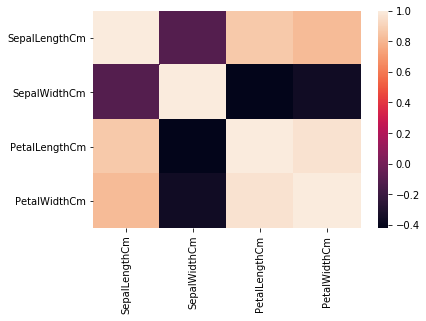

In [77]:
# correlacoes
dfcorr = df_novo.corr()
sns.heatmap(dfcorr)

In [78]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

# vendo qual a relevancia das varaveis com um simples comando de PCA
pca.explained_variance_ratio_

* ## razao da variancia

In [79]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

### **Podemos ver que os dois primeiros ja sao 97% relevantes para o nossos dados**

# Vendo agora a variancia acumulativa
* ## variancia acumulaiva

In [80]:
pca.explained_variance_ratio_.sum()
# resultado é 1 pois é o 100% da soma da relevancia de todas as variaveis 

1.0

In [81]:
df_iris = pd.DataFrame(pca.components_, columns=name_columns)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


# vendos correlaçoes com o heatmap do seaborn

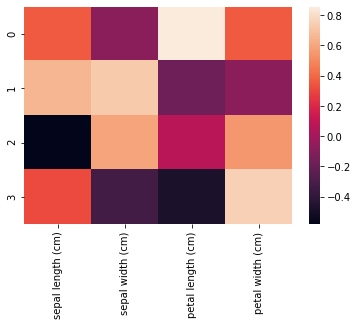

In [82]:
import seaborn as sns
sns.heatmap(df_iris)

### grafico de votovelo para mostrar o numero de componentes principais 

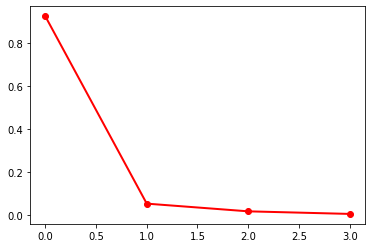

In [87]:
plt.plot(pca.explained_variance_ratio_, 'ro-', Linewidth=2)